<img src="./img/logo_UTN.svg" align="right" width="300" />

# Medicion de THD a la salida AGC
#### Medidas Electrónicas I 2023 - UTN FRBA

****
  
El controlador automático de ganancia AGC (por sus iniciales en inglés, _automatic gain control_) consiste en un dispositivo de control que modifica la amplicacion de una señal de entrada en funcion del nivel de potencia de la señal que está generando a la salida. Dicha realimentacion provee al dispositivo de una medida del nivel de potencia a la salida que luego sera comparada con el nivel de referencia seleccionado por el usuario. En consecuencia, aumentara o disminuira la ganancia segun el caso.

  
  Para caracterizar la calidad de la señal de salida, se llevan a cabo mediciones de la distorsión armónica de la misma (THD). El ensayo consiste en introducir una señal de entrada senoidal perfecta, cuya amplitud sea variable en el tiempo, ascendente y descendente. Luego, se mide la señal a la salida del AGC y se evalúa nuevamente el valor de THD. Esta comparacion nos dara una idea de la distorsion que le aplica a la señal el dispositivo.

****

## Generación de la señal de prueba

La señal de prueba consiste en una senoidal cuya amplitud es modulada por una señal triangular con una frecuencia 10 veces menor que la senoidal original (**AVERIGUAR POR QUE TIENE QUE CUMPLIRSE ESTO**). Los pares de valores tiempo-amplitud son guardados en un archivo .csv para luego ser levantados en el dispositivo como señal de salida.

In [15]:
#### Bibliotecas ####
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from math import floor
import csv

plt.rcParams['figure.figsize'] = [12, 5]

In [2]:
#### Funciones ####
def writeToCSV(output_file, data0, data1):
    '''
    Funcion para escribir datos a un archivo .csv

    Parameters
    ----------
    output_file : string
        Nombre del archivo a guardar. Si no existe lo crea y si ya existe
        lo sobreescribe.
    data0 : array
        Vector con datos a guardar en la primera columna.
    data1 : array
        Vector con datos a guardar en la segunda columna.

    Returns
    -------
    None.

    '''
    with open(output_file, mode='w', newline='') as archivo_csv:
            escritor_csv = csv.writer(archivo_csv,delimiter=';')
            escritor_csv.writerow(["Tiempo","Amplitud"])
         # Agregar un salto de línea
         
    with open(output_file, mode='a', newline='') as archivo_csv:
        
        escritor_csv = csv.writer(archivo_csv,delimiter=';')
        for col0, col1 in zip(data0, data1):
          escritor_csv.writerow([col0, col1])

def get_THD(test_signal):
    yf = np.fft.fft(test_signal)
    yf = yf[1:floor(len(yf)/2)]
    yf = np.abs(yf) # Obtengo el modulo

    # Calculo el indice donde esta la frecuencia fundamental
    f0_index = np.argmax(yf)

    # Armo vector con los indices de los armonicos
    harmonics__index = np.arange(f0_index,len(yf)-1,f0_index)

    # Creo vector con valores de los harmonicos
    harmonics_values = yf[harmonics__index]

    # Calculo thd
    thd = np.sqrt(np.sum(harmonics_values[1:]**2))/harmonics_values[0]
    
    return thd

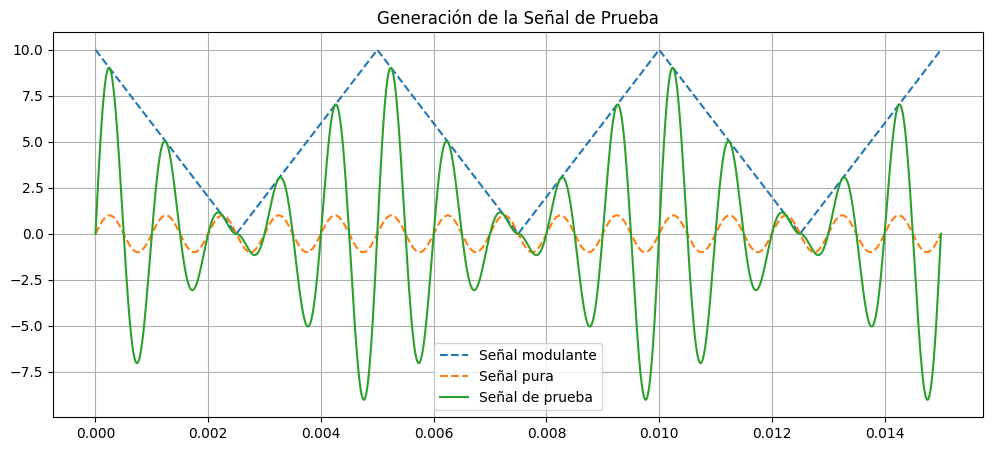

THD de la señal pura:  0.0004992027412206388
THD de la señal modulada:  0.000938951910207469


In [16]:
# Parametros de la señal
N= 15               # N° de ciclos
frec= 1000          # 1kHz
cycles= 1/frec      # Periodo de un ciclo
sig_points= 4000    # N° de muestras

# Amplitudes
a_max= 10

test_points= np.linspace(0, N*cycles, sig_points)
amplitudes= a_max * np.abs(sig.sawtooth(2 * np.pi * frec/10 * test_points, 0.5))
''' 
    Sawtooth
    
    El 0.5 indica que la mitad del periodo es ascendente y la otra mitad
    descendente. Esto genera una señal triangular.
    La frecuencia va /10 porque si es mayor, la señal no se modula, y si es
    menor queda cualquier cosa. /10 es el punto justo (hallado empiricamente)
'''
senoidal_pura= np.sin(2 * np.pi * frec * test_points)
test_signal= amplitudes * senoidal_pura


plt.figure()
plt.plot(test_points, amplitudes, label='Señal modulante', linestyle='--')
plt.plot(test_points, senoidal_pura, label='Señal pura', linestyle='--')
plt.plot(test_points, test_signal, label='Señal de prueba')
plt.title('Generación de la Señal de Prueba')
plt.legend()
plt.grid()
plt.show()

writeToCSV("test_signal.csv", test_points, test_signal)

thd_pura= get_THD(senoidal_pura)
thd_modulada= get_THD(test_signal)

print("THD de la señal pura: ",thd_pura)
print("THD de la señal modulada: ",thd_modulada)

Tambien se observa la diferencia entre la THD de la senoidal perfecta y la modulada que sera usada como señal de prueba. Se observa que, si bien la diferencia existe, la misma es despreciable.

****

## Señal de prueba como señal de entrada

****

## Medicion de THD a la salida

Mediante el uso de instrumentación virtual (VISA) se conecta una PC al osciloscopio que realizara la medicion de la señal de salida para registrar los datos directamente y facilitar su procesamiento.
Es preciso señalar que la salida del AGC es diferencial, por lo que el osciloscopio mide en sus dos canales y luego en la PC se realiza la diferencia entre ambos para obtener la señal correctamente.

A continuación se muestra la señal obtenida de la medicion.

In [ ]:
### Ploteo de la medicion a partir de los datos medidos

Se observa que el valor de THD es XXXXX. Dicho valor es MENOR/MAYOR (seguro mayor) que la THD de la señal de prueba original.